In [2]:
import numpy as np
from numpy.random import default_rng
import math
from math import ceil, log
from numpy import e
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [3]:
def psi1(t, c1, c2, c3, c4, epsilon, delta, chi):
    return c1*epsilon*e**(-t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c2*epsilon*t*e**(-t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c2*squareroot(epsilon, delta, chi)*e**(-t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c3*epsilon*e**(t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c4*epsilon*t*e**(t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c4*(delta**2 + 2*delta*chi + epsilon**2)*e**(t*squareroot(epsilon, delta, chi)/2) \
    /((delta + 2*chi)*squareroot(epsilon, delta, chi))
    
def psi2(t, c1, c2, c3, c4, epsilon, delta, chi):
    return -c1*squareroot(epsilon, delta, chi)*e**(-t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c2*epsilon*e**(-t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) - \
    c2*t*squareroot(epsilon, delta, chi)*e**(-t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c3*squareroot(epsilon, delta, chi)*e**(t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c4*epsilon*e**(t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c4*t*squareroot(epsilon, delta, chi)*e**(t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi)
    
def phi1(t, c1, c2, c3, c4, epsilon, delta, chi):
    return c1*e**(-t*squareroot(epsilon, delta, chi)/2) + \
    c2*t*e**(-t*squareroot(epsilon, delta, chi)/2) + \
    c3*e**(t*squareroot(epsilon, delta, chi)/2) + \
    c4*t*e**(t*squareroot(epsilon, delta, chi)/2)

def phi2(t, c2, c4, epsilon, delta, chi):
    return c2*e**(-t*squareroot(epsilon, delta, chi)/2) + \
    c4*e**(t*squareroot(epsilon, delta, chi)/2)

def check_sqrt(epsilon, delta, chi):
    return -delta**2 - 2*delta*chi - epsilon**2 < 0

def squareroot(epsilon, delta, chi):
    result = -delta**2 - 2*delta*chi - epsilon**2
    return math.sqrt(result)

In [4]:
def func(xp):
    return (abs(psi1(xp[0], xp[1], xp[2], xp[3], xp[4], xp[5], xp[6], xp[7])))**2 + \
            (abs(psi2(xp[0], xp[1], xp[2], xp[3], xp[4], xp[5], xp[6], xp[7])))**2 + \
            (abs(phi1(xp[0], xp[1], xp[2], xp[3], xp[4], xp[5], xp[6], xp[7])))**2 + \
            (abs(phi2(xp[0], xp[2], xp[4], xp[5], xp[6], xp[7])))**2

In [4]:
a=[]
for b in range(15):
    a.append([ [0]*132 for c in range(8)])
print(len(a))
print(len(a[0]))
print(len(a[0][0]))

15
8
132


In [5]:
data = []
for d in range(8):
    data.append([0]*20)
print(len(data))

8


In [6]:
def gen_xnew(x, x_new, i, lower_limit, higher_limit):
    max_stddev_low=x[i]-lower_limit[i];
    max_stddev_high=higher_limit[i]-x[i];
    if max_stddev_low <= max_stddev_high:
        std_dev=max_stddev_low/10;
    else:
        std_dev=max_stddev_high/10;
    x_new.append(np.random.normal(x[i], std_dev))
    rng = default_rng()
    x_new[i]=min(max(x[i] + np.random.randn()*std_dev, lower_limit[i]), higher_limit[i]);

In [27]:
T=1;
T_min=0.000001;
alpha=0.9;
total_iteration=ceil(log(T_min/T)/log(alpha));
total_loop=20;
# [t, c1p, c2p, c3p, c4p, epsilonp, deltap, chip]
lower_limit=[9.9999, -10, 0.1, 0.1, 0.1, 0.5, 0.5, -0.9]
higher_limit=[10, 0.8, 0.8, 0.8, 0.8, 1, 1.2, -0.4]
dimension=8;
x0= [9.99997769055193, -8.042455772869037, 0.4104156269769683, 0.7626971134550099, 0.12854464458518508, 0.775287951314912, 0.5104429911912247, -0.8494864484591551]
#[9.99998057, -4.56026166, 0.22418289, 0.8, 0.1, 0.80661314, 0.50003705, -0.9]
#[9.999999, -8, 0.4, 0.8, 0.13, 0.7, 1.01, -0.8]
#[9.99997769055193, -8.042455772869037, 0.4104156269769683, 0.7626971134550099, 0.12854464458518508, 0.775287951314912, 0.5104429911912247, -0.8494864484591551]
#[9.9999, 0.3, 0.1, 0.6, 0.4, 0.5, 0.7, 0.4]

data = [] # 2D array 'data' stores [t, c1p, c2p, c3p, c4p, epsilonp, deltap, chip, obj]
for d in range(dimension+1):
    data.append([0]*total_loop)

result_x=[]
for b in range(total_loop):
    result_x.append([ [0]*total_iteration for c in range(dimension)])
print(len(result_x))
print(len(result_x[0]))
print(len(result_x[0][0]))
# test = []
# for b in range(15):
#     test.append([[ [0]*132 for c in range(8)]]) #dimension by total_iteration
    
print('result_x', len(result_x), len(result_x[0]), len(result_x[0][0]))
# f.write('BEGIN\n')
for loop in range(total_loop):
    rng = default_rng()
    x=[]
    for i in range(dimension):
        if loop==0:
            x.append(x0[i])
        else:
            x.append(lower_limit[i]+(higher_limit[i]-lower_limit[i]) * rng.random())
    while (check_sqrt(x[5], x[6], x[7])):
        x[5] = lower_limit[5]+(higher_limit[5]-lower_limit[5]) * rng.random()
        x[6] = lower_limit[6]+(higher_limit[6]-lower_limit[6]) * rng.random()
        x[7] = lower_limit[7]+(higher_limit[7]-lower_limit[7]) * rng.random()
    curr_func = func(x)
    
    for iteration in range(total_iteration):
            x_new=[]

            for i in range(dimension):
                gen_xnew(x, x_new, i, lower_limit, higher_limit)
#                 max_stddev_low=x[i]-lower_limit[i];
#                 max_stddev_high=higher_limit[i]-x[i];
#                 if max_stddev_low <= max_stddev_high:
#                     std_dev=max_stddev_low/10;
#                 else:
#                     std_dev=max_stddev_high/10;
#                 x_new.append(random.normalvariate(x[i], std_dev))
#                 rng = default_rng()
#                 x_new[i]=min(max(x[i] + np.random.randn()*std_dev, lower_limit[i]), higher_limit[i]);
            while (check_sqrt(x_new[5], x_new[6], x_new[7])):
                gen_xnew(x, x_new, 5, lower_limit, higher_limit)
                gen_xnew(x, x_new, 6, lower_limit, higher_limit)
                gen_xnew(x, x_new, 7, lower_limit, higher_limit)
            #print('x_new', x_new)
            new_func = func(x_new)

            P=math.exp(((new_func-curr_func)/curr_func)*5/T);

            if P>1:
                x=x_new
                curr_func = new_func
            else:
                rng = default_rng()
                random_number=rng.random()

                if P>random_number:
                    x=x_new
                    curr_func = new_func
            for d in range(dimension):
                result_x[loop][d][iteration]=x[d];
    
    data[-1][loop] = curr_func
    for param in range(dimension):
        data[param][loop] = x[param]
    
    T=T*alpha;
    
f = open("output.txt", "a")
f.write('curr_func\t' + str(curr_func))
f.write('\nnew_func\t' + str(new_func))
f.write('\nx\t'+ str(x))
f.write('\nx_new\t' + str(x_new))
#f.write('\nresult_x:\n' + str(result_x) + '\n')
f.write('END\n\n')    
f.close()

20
8
132
result_x 20 8 132


In [28]:
print('curr_func', curr_func)
print('new_func', new_func)
print('x', x)
print('x_new', x_new)
print('func', func([9.99997769055193, -8.042455772869037, 0.4104156269769683, 0.7626971134550099, 0.12854464458518508, 0.775287951314912, 0.5104429911912247, -0.8494864484591551]))

curr_func 197617.34197525718
new_func 197617.34197525718
x [9.999981746773184, -0.4672073872288932, 0.11075303566243597, 0.10721917049052111, 0.7529415660700509, 0.5080384786210618, 1.0103607830306742, -0.8957956470530225]
x_new [9.999981746773184, -0.4672073872288932, 0.11075303566243597, 0.10721917049052111, 0.7529415660700509, 0.5080384786210618, 1.0103607830306742, -0.8957956470530225]
func 0.7670691278323817


In [93]:
xraw = [1, 2, 3]
yraw = [10, 20, 30]
x, y = np.meshgrid(xraw, yraw)
print(x)
print(y)
# zraw = [11, 22, 33, 44, 55, 66, 77, 88, 99]

# #lats = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])# [43.2, 43.2, 43.2, 45.5, 45.5, 45.5, 65.3, 65.3, 65.3])
# lats = np.array([43.2, 43.2, 43.2, 45.5, 45.5, 45.5, 65.3, 65.3, 65.3])
# #lons = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90]) #[5.5, 102.5, 116.2, 5.5, 102.5, 116.2, 5.5, 102.5, 116.2])
# lons = np.array([5.5, 102.5, 116.2, 5.5, 102.5, 116.2, 5.5, 102.5, 116.2])
# vals = np.array([11, 22, 33, 44, 55, 66, 77, 88, 99]) #[3, 4, 5, 6, 7, 7, 9, 1, 0])

# lat_vals, lat_idx = np.unique(lats, return_inverse=True)
# print(lat_vals)
# lon_vals, lon_idx = np.unique(lons, return_inverse=True)
# print(lon_vals)
# vals_array = np.empty(lat_vals.shape + lon_vals.shape)
# #vals_array.fill(np.nan) # or whatever yor desired missing data flag is
# vals_array[lat_idx, lon_idx] = vals
# print(vals_array)

[[1 2 3]
 [1 2 3]
 [1 2 3]]
[[10 10 10]
 [20 20 20]
 [30 30 30]]


In [92]:
figs = []
for i in range(7):
    figs.append(plt.Figure(figsize=plt.figaspect(1/(7-i))))

# data stores [t, c1p, c2p, c3p, c4p, epsilonp, deltap, chip, obj]

#  t,c1 ;  t,c2 ;  t,c3 ;  t,c4 ;  t, d ; t, e ;  t, x (7) - t
# c1,c2 ; c1,c3 ; c1,c4 ; c1, e ; c1, d ; c1, x        (6) - c1
# c2,c3 ; c2,c4 ; c2, e ; c2, d ; c2, x                (5) - c2
# c3,c4 ; c3, e ; c3, d ; c3, x                        (4) - c3
# c4, e ; c4, d ; c4, x                                (3) - c4
#  e, d ;  e, x                                        (2) - e
#  d, x                                                (1) - d

for overall in range(7):
    num_axs = 7 - overall
    for plot_count in range(num_axs):
        ax = figs[overall].add_subplot(1, num_axs, plot_count+1, projection='3d')
        #ax.scatter3D(data[overall], data[overall+plot_count+1], data[-1])
        
        #prep data
        #x_vals, x_idx = np.unique(data[overall], return_inverse=True)
        #y_vals, y_idx = np.unique(data[overall+plot_count+1], return_inverse=True)
        x, y = np.meshgrid(data[overall], data[overall+plot_count+1])
        print(x.shape)
        print(y.shape)
        #print(z_array)
        # print(y)
#        ax.plot_surface(x, y, z_array, cmap=cm.coolwarm, linewidth=0, antialiased=False)
        ax.set_title('params ' + str(overall) + ' ' + str(overall+plot_count+1))
        #ax.set(xlabel=str(overall), ylabel=str(overall+plot_count+1))
    

# container = Figure()
# c1c2 = container.add_subplot(111)
# ax = plt.axes(projection='3d')
# ax.scatter3D(c1_data, c2_data, curr_data)
# ax.plot3D(c1_data, c2_data, curr_data)
# ax.set_xlabel('c1')
# ax.set_ylabel('c2')
# ax.set_zlabel('obj');,,,

(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)


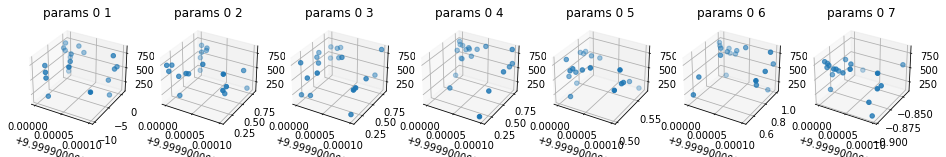

In [52]:
# for the following figures:
# param 0: t
# param 1: c1
# param 2: c2
# param 3: c3
# param 4: c4
# param 5: epsilon
# param 6: delta
# param 7: chi

figs[0]

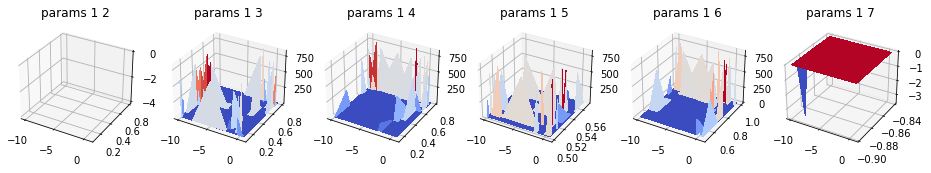

In [41]:
figs[1]

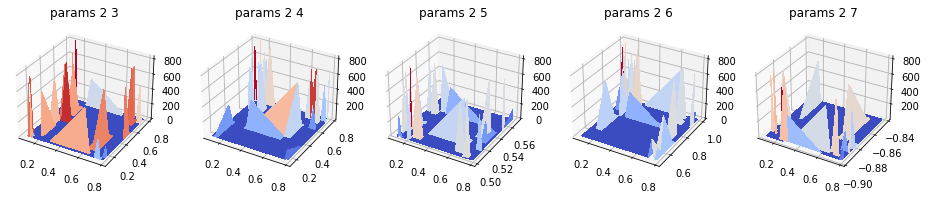

In [42]:
figs[2]

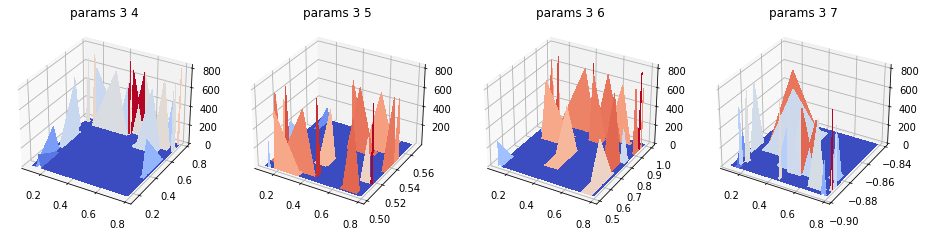

In [43]:
figs[3]

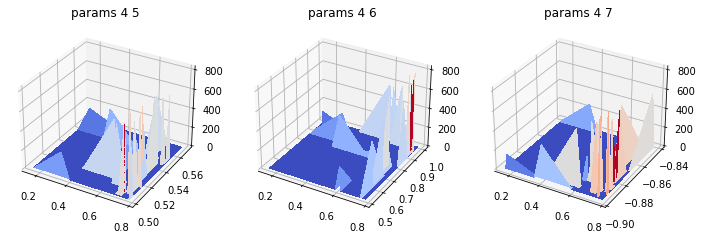

In [44]:
figs[4]

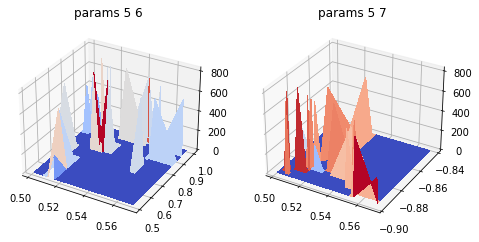

In [37]:
figs[5]

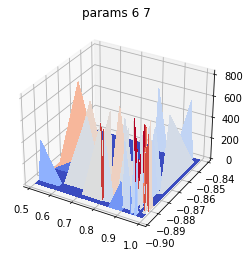

In [38]:
figs[6]

In [5]:
func([9.99997769055193, -8.042455772869037, 0.4104156269769683, 0.7626971134550099, 0.12854464458518508, 0.775287951314912, 0.5104429911912247, -0.8494864484591551])

0.7670691278323817

In [32]:
# curr_func 14.376559594847258
# new_func 32.17818371786194
# x [9.999913056066875, -7.119789670550192, 0.25662503364706785, 0.5167353412139135, 0.46508426451158724, 0.7271938629544439, 0.709081157120824, -0.7343677953588169]
# x_new [9.999913296832121, -6.769933657861436, 0.24906499029765627, 0.5219559777341891, 0.5129456761821671, 0.7241798306349957, 0.7338001754417296, -0.7494123515866848, 0.7640431542575887, 0.703327405552994, -0.7407571207489132]


# curr_func 9.43705199201565
# new_func 20.527725587034467
# x [9.999959998846311, -7.101679980590005, 0.518417403191349, 0.2516613537030904, 0.12731148421110813, 0.5910242510732946, 0.993154977107765, -0.6849163156983782]
# x_new [9.999961909440753, -6.9798868597892, 0.49402938465806573, 0.27268982686642196, 0.13169250039107336, 0.5837416568333559, 0.9927713576081004, -0.7087776842619105]

#total_loop = 100
# curr_func 14.69633424170509
# new_func 53.51544789547792
# x [9.999924344559266, -6.336582428852417, 0.20331321265487146, 0.2925900107404784, 0.7951839949442742, 0.7307464770320613, 0.7374986457073245, -0.7314342271955183]
# x_new [9.999927485399052, -6.165708854318511, 0.213241884293428, 0.2884456475260988, 0.7949201573694318, 0.7114039715222761, 0.7334692332823225, -0.7412824999683454]

#total_loop = 100
# 1.584791498682757
# 1.3140146888741646
# [9.99997769055193, -8.042455772869037, 0.4104156269769683, 0.7626971134550099, 0.12854464458518508, 0.775287951314912, 0.5104429911912247, -0.8494864484591551]
# [9.999977523135433, -8.103485111943424, 0.36838046756729437, 0.7618781727253613, 0.13054616119420606, 0.7736143948027439, 0.5106212507467394, -0.8475251790296481, 0.7731355701040676, 0.5107002399666406, -0.8547977686887038, 0.7527257881845099, 0.5112820082269468, -0.8436852728695896]

# total_loop = 50
# 26.32455338373471
# 26.32455338373471
# [9.999935114250563, -6.984139855625585, 0.37691176751633726, 0.6390403107186068, 0.10464108752966123, 0.6318518122298166, 0.5122217741646995, -0.8120677902590243]
# [9.999935114250563, -6.984139855625585, 0.37691176751633726, 0.6390403107186068, 0.10464108752966123, 0.6318518122298166, 0.5122217741646995, -0.8120677902590243]

# 73.86005019731819
# 52.835106308519116
# [9.999988996801758, -9.614622781898683, 0.6100189949100389, 0.1247041974772469, 0.21357403272030956, 0.5122808773662109, 0.9551582563671845, -0.7335633058712296]
# [9.999989271471135, -9.574600477802946, 0.5951850963258354, 0.12652137827715798, 0.20919314467805197, 0.5114005244254374, 0.9557977432310301, -0.700201295324346]

#195.74507494823297
#[9.9999527550344, -8.588261159765286, 0.113940045127527, 0.6831331798297872, 0.1496215687079959,
#0.5094082374474591, 0.903509159837851, -0.8804959763584924]